In [133]:
import rasterio

import matplotlib.pyplot as plt

# project between coordinate systems, also the moon
import cartopy
import cartopy.crs

# some math
import numpy as np

# normalizations
import matplotlib.colors

# plotting
import matplotlib.pyplot as plt

# colormaps
import pycpt
%matplotlib inline

In [7]:
# Read the USGS tiff file
with rasterio.open('/Users/baart_f/data/moon/WAC_GLD100_E000N1800_016P.tiff') as ds:
    arr = ds.read(1)

In [98]:
# Create a moon globe
moon = cartopy.crs.Globe(semimajor_axis=1737400, semiminor_axis=1737400, ellipse=None)
# This is an equal area map, central on 180 degrees
img_projection = cartopy.crs.PlateCarree(globe=moon, central_longitude=180)
# Optional use other projection 
projection = cartopy.crs.LambertConformal(globe=moon)

In [99]:
# from the gdalinfo
origin = (-0.000000000000000, 2729101.538173536304384)
pixel_size = (1895.209401509400095, -1895.209401509400095)
l, r, b, t = extent = (0, 10916406.153, -2729101.538, 2729101.538)


In [112]:
# optionally use this for hill shading (not used because bump mapped using blender)
ls = matplotlib.colors.LightSource(azdeg=135, altdeg=40)

In [163]:
# some colormaps I tried
cmap = pycpt.load.cmap_from_cptcity_url('wkp/shadowxfox/colombia.cpt')
cmap = pycpt.load.cmap_from_cptcity_url('grass/etopo2.cpt')
# somehow utah looks most like the moon....
cmap_topo = pycpt.load.cmap_from_cptcity_url('esri/hypsometry/na/utah_1.cpt')
# and this is goes nicely from dark to very light
cmap_bathy = pycpt.load.cmap_from_cptcity_url('xkcd/xkcd-bath.cpt')

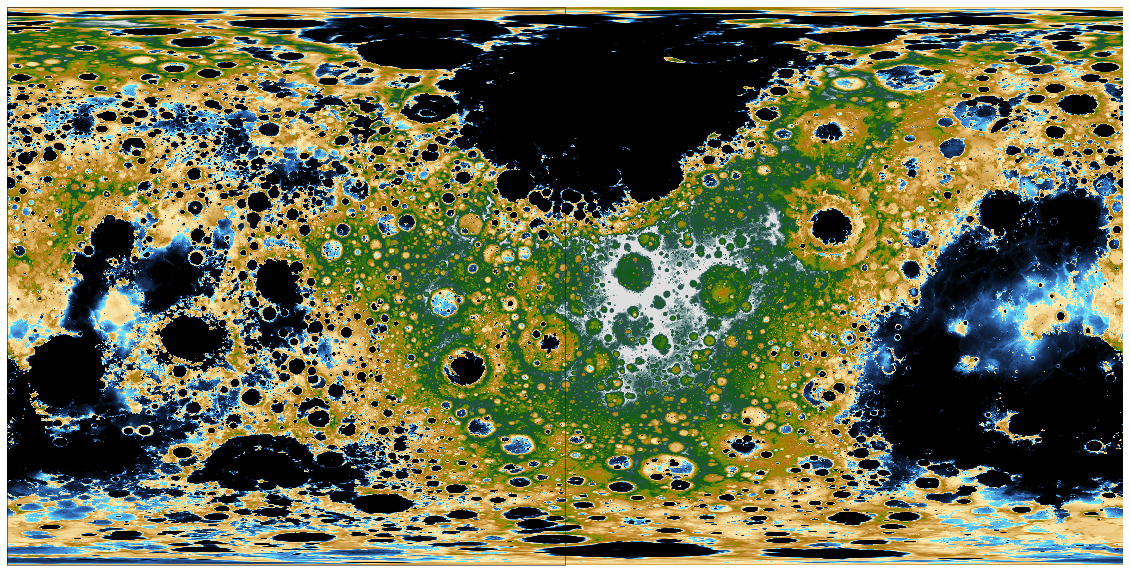

In [168]:
# render image
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(projection=img_projection))

# split into topo and bathy
sealevel = -1000
N_bathy = matplotlib.colors.Normalize(vmin=-2000, vmax=sealevel, clip=True)
N_topo = matplotlib.colors.Normalize(vmin=sealevel, vmax=6000, clip=True)

# 2 colors
bathy_colors = cmap_bathy(N_bathy(arr))
topo_colors = cmap_topo(N_topo(arr))
# mix colors
colors = np.where(np.repeat((arr < sealevel)[:,:,np.newaxis], 4, axis=2), bathy_colors, topo_colors)

# and let's have a look
ax.imshow(colors, transform=img_projection, extent=extent) # , cmap=cmap, vmin=-6000, vmax=6000)

# there's a dark line in the middle, probably due to the extents not quite matching up, don't bother...

In [169]:
# Render this and create a 3D model
plt.imsave('/Users/baart_f/Documents/etsy/3d/moon/albedo.png', colors)
plt.imsave('/Users/baart_f/Documents/etsy/3d/moon/bump.png', arr, vmin=-6000, vmax=6000, cmap='gray')


In [139]:
N_water = matplotlib.colors.Normalize(-2000, -1000, clip=True)
plt.imsave('/Users/baart_f/Documents/etsy/3d/moon/water.png', N_water(arr), cmap='gray')

In [170]:
# Render the result
!blender -b moon.blend -x 1 -o //render -a